## 5.5 Run a model of your choice

In [ ]:
#With the example above, you should be able to run any Hugging Face model that fits in a single GPU now.   Your task is to try one on your own. 

In [ ]:
#### Your Task ####
# Take a look at the LLM models in /share/LLMs/, you can find out their usage on hugging face hub
# Choose any one 
# Write the code to load it, using the GPU in your pod.
# Create at least three example use cases of the model, which should be different from what is given in the hugging face page.
# If you want to download your own model from HuggingFace, please do so on your laptop, 
# and then upload onto the cluster (instead of downloading it directly on the cluster as we have very limited Internet bandwidth.)



In [1]:
#### Your Task ####
# you may install any dependencies here using pip install, for example
# pip install timm einops


In [5]:
from diffusers import StableDiffusionPipeline

# Load the model
pipe = StableDiffusionPipeline.from_pretrained("/share/LLMs/stable-diffusion-2-1", use_auth_token=False)

# Generate an image
pipe = pipe.to("cuda")  # Use "cpu" if you don't have a GPU
image = pipe("A photo of a space shuttle launching", guidance_scale=7.5).images[0]

# Save the image
image.save("generated_image.png")


Keyword arguments {'use_auth_token': False} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

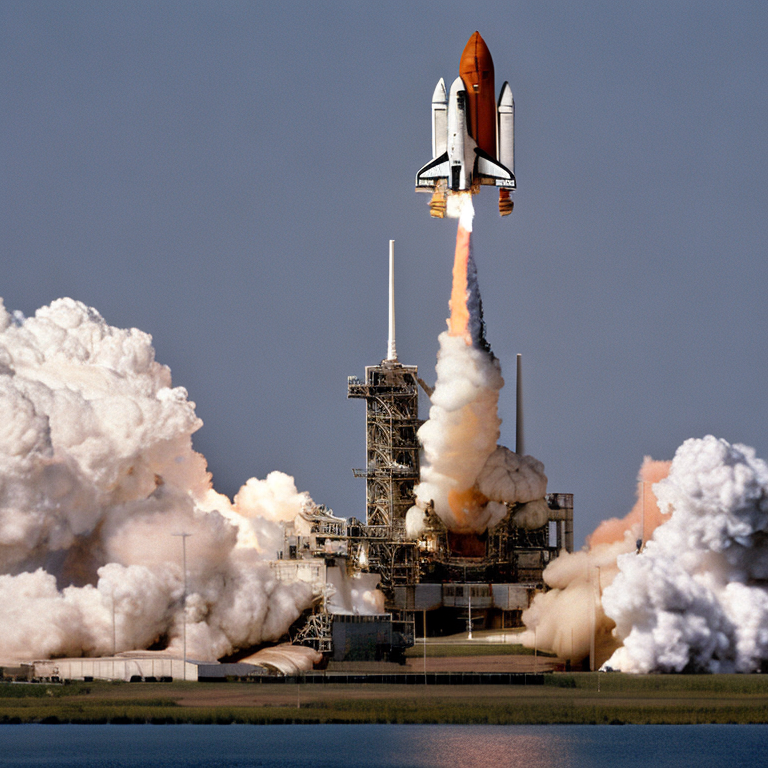

In [6]:
#### Your Task ####
#### Example use case 1 ####

image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

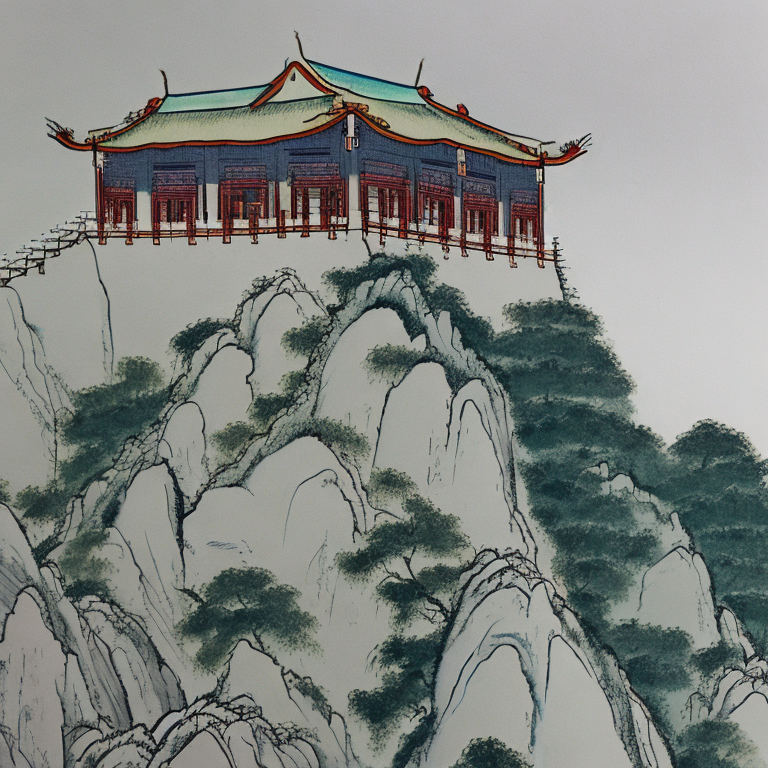

In [10]:
#### Your Task ####
#### Example use case 2 ####
image = pipe("A photo of a temple on a mountain, Chinese painting style", guidance_scale=7.5).images[0]
image.show()

In [11]:
image.save("image1.png")

Keyword arguments {'use_auth_token': False} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

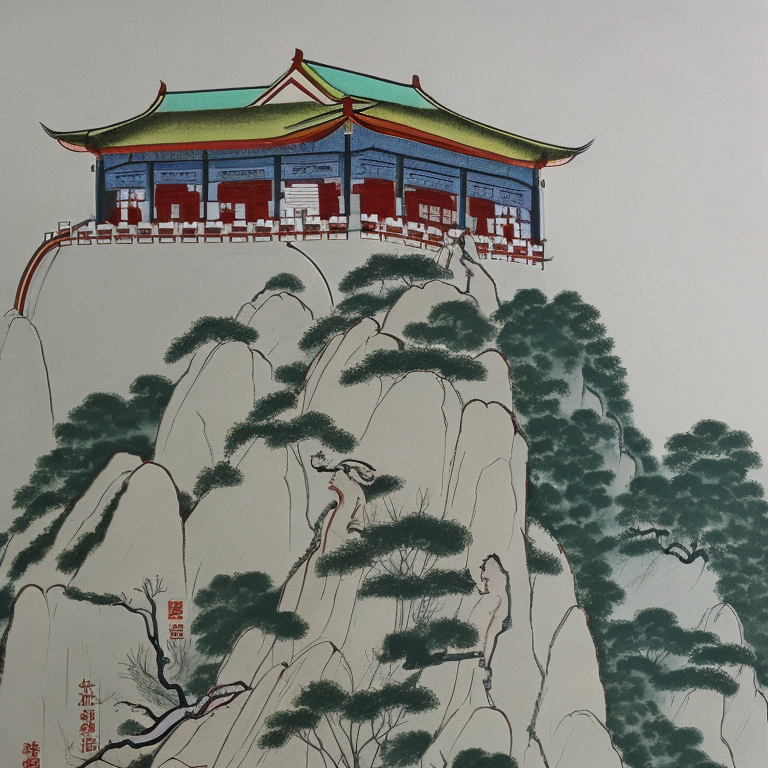

In [30]:
#### Your Task ####
#### Example use case 3 ####

from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import torch

# Initialize the pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("/share/LLMs/stable-diffusion-2-1", use_auth_token=False).to("cuda")

# Load your input image
input_image_path = "/root/llm_course_public/lab5/image1.png"
input_image = Image.open(input_image_path).convert("RGB")

# Define your prompt
prompt = "A Chinese painting of a Buddhist temple on the mountain"

# Perform the img2img task
edited_image = pipe(prompt=prompt, image=input_image, strength=0.6).images[0]

# Save the edited image
edited_image_path = "edited1.png"
edited_image.save(edited_image_path)
edited_image.show()
